In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

In [38]:
df=pd.read_excel('dataset_filledsupplier_currency_orderday.xlsx')

In [39]:
df['창고입고'] = pd.to_datetime(df['창고입고'], errors='coerce')
df['발주'] = pd.to_datetime(df['발주'], errors='coerce')
df['리드타임'] = (df['창고입고'] - df['발주']).dt.days


In [45]:
리드타임_0_갯수 = (df['리드타임'] == 0).sum()
print(리드타임_0_갯수)


292


C:\Users\User\anaconda3\envs\ship\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


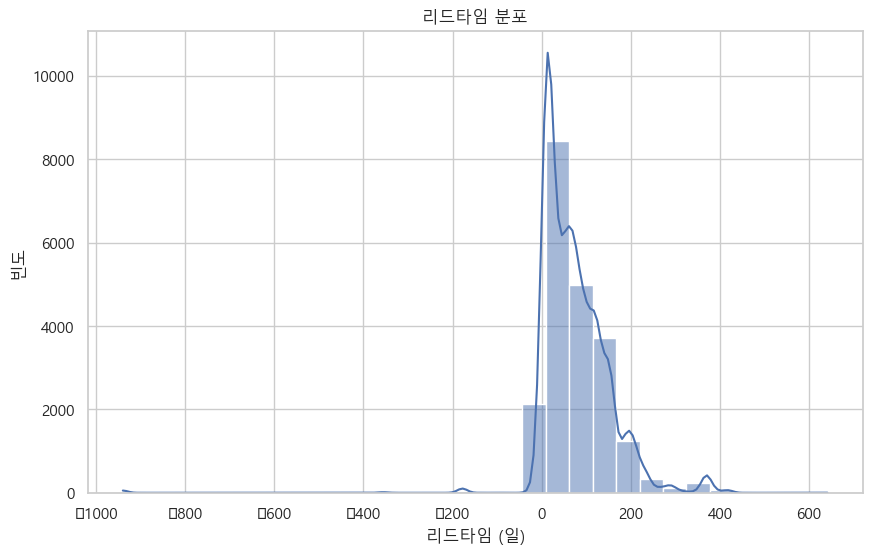

In [46]:
plt.rcParams['font.family']='Malgun Gothic'

plt.figure(figsize=(10, 6))
sns.histplot(df['리드타임'], bins=30, kde=True)
plt.title('리드타임 분포')
plt.xlabel('리드타임 (일)')
plt.ylabel('빈도')
plt.show()

In [5]:
pd.set_option('display.max_columns', None)
df.head()

,청구서번호,No.,Subject,Machinery,Assembly,청구품목,Unnamed: 6,Part No.1,Part No.2,청구량,견적,견적수량,견적화폐,견적단가,발주번호,발주처,발주,발주수량,발주금액,D/T,미입고 기간,창고입고,창고입고수량,Control No.,입고창고,창고출고,창고출고수량,출고선박,출고운반선,선박입고,선박입고수량,완료 여부
0,COK-BS-DSP-1901004,1,COK-F-DECK-190104-01,CARGO BOOM VANG BLOCK (STBD 하),BLOCK,"MCKISSICK CONSTRUCTION BLOCKS (WIRE SIZE : 5/8"")",NaN,C15S10BS,2103170,2.0,2019-01-11,2.0,USD,1022.76,COK-BS-OSP-1901002,MATSUI(U.S.A) COROPRATION,2019-01-11,2,2.288732e+06,56,NaN,2019-05-03,2,19-04-077,BW,2019-05-20,2,COK,ONENESS,2019-06-09,2,완료
1,COK-BS-DSP-1901004,2,COK-F-DECK-190104-01,SPANISH BOOM VANG BLOCK (PORT 상),BLOCK,"MCKISSICK CONSTRUCTION BLOCKS (WIRE SIZE : 5/8"")",NaN,C15D10BS,2103180,1.0,2019-01-11,1.0,USD,1713.96,COK-BS-OSP-1901002,MATSUI(U.S.A) COROPRATION,2019-01-11,1,1.917750e+06,56,NaN,2019-04-18,1,19-04-064,BW,2019-05-20,1,COK,ONENESS편 탁송,2019-06-09,1,완료
2,COK-BS-DSP-1901004,3,COK-F-DECK-190104-01,PURSE BLOCK,TOW BLOCK,WESTEC 20TON TOW BLOCK,NaN,WESTEC 20TON TOW BLOCK,NaN,1.0,2019-01-11,1.0,USD,5843.75,COK-BS-OSP-1901002,MATSUI(U.S.A) COROPRATION,2019-01-11,1,6.538572e+06,56,NaN,2019-05-03,1,19-04-077,BW,2019-05-20,1,COK,ONENESS,2019-06-09,1,완료
3,COK-BS-DSP-1905036,1,폰페이 재고정정,MAIN ENGINE,POWER PACK AS,GE POWER PACK FORK - E7(B),NaN,40028340,NaN,8.0,2019-04-01,8.0,USD,4000.00,COK-BS-OSP-1905016,MATSUI(U.S.A) COROPRATION,2019-04-01,8,3.680000e+07,60,NaN,2019-04-01,8,NaN,PN,2019-08-01,1,DEO,HANARO,2019-08-24,1,완료
4,COK-BS-DSP-1905036,2,폰페이 재고정정,MAIN ENGINE,POWER PACK AS,GE POWER PACK FORK - E7(B),NaN,40028340,NaN,8.0,2019-04-01,8.0,USD,4000.00,COK-BS-OSP-1905016,MATSUI(U.S.A) COROPRATION,2019-04-01,8,3.680000e+07,60,NaN,2019-04-01,8,NaN,PN,2019-08-29,7,ELS,SL ARCHI,2019-09-30,7,완료


In [68]:
df[['Machinery', 'Assembly', '청구품목', 'Part No.1', '견적화폐', '발주처', '발주', '창고입고']].head(20)

,Machinery,Assembly,청구품목,Part No.1,견적화폐,발주처,발주,창고입고
0,CARGO BOOM VANG BLOCK (STBD 하),BLOCK,"MCKISSICK CONSTRUCTION BLOCKS (WIRE SIZE : 5/8"")",C15S10BS,USD,MATSUI(U.S.A) COROPRATION,2019-01-11,2019-05-03
1,SPANISH BOOM VANG BLOCK (PORT 상),BLOCK,"MCKISSICK CONSTRUCTION BLOCKS (WIRE SIZE : 5/8"")",C15D10BS,USD,MATSUI(U.S.A) COROPRATION,2019-01-11,2019-04-18
2,PURSE BLOCK,TOW BLOCK,WESTEC 20TON TOW BLOCK,WESTEC 20TON TOW BLOCK,USD,MATSUI(U.S.A) COROPRATION,2019-01-11,2019-05-03
3,MAIN ENGINE,POWER PACK AS,GE POWER PACK FORK - E7(B),40028340,USD,MATSUI(U.S.A) COROPRATION,2019-04-01,2019-04-01
4,MAIN ENGINE,POWER PACK AS,GE POWER PACK FORK - E7(B),40028340,USD,MATSUI(U.S.A) COROPRATION,2019-04-01,2019-04-01
5,NET,H-EX,"H-EX #30 * 4 1/4"", 100MD * 120FMS","HEX#30X4 1/4""X100MDX120FMS",KRW,KTI,2019-06-03,2019-06-15
6,NET,NYLON,"NYLON #54 * 4 1/4"", 100MD * 50FMS","NYLON#54X4-1/4""X100MDX50FMS",KRW,KTI,2019-06-03,2019-06-15
7,NET,NYLON,"NYLON #48 * 4 1/4"", 100MD * 50FMS","NYLON#48X4-1/4""X100MDX50FMS",KRW,KTI,2019-06-03,2019-06-15
8,NET,NYLON,"NYLON #42 * 4 1/4"", 100MD * 50FMS","NYLON#42X4-1/4""X100MDX50FMS",KRW,KTI,2019-06-03,2019-06-15
9,NET,NYLON,"NYLON #36 * 4 1/4"", 100MD * 50FMS","NYLON#36X4-1/4""X100MDX50FMS",KRW,KTI,2019-06-03,2019-06-15


In [44]:
df[['청구품목', 'Part No.1', '견적화폐', '견적단가', '발주처']].tail(4)

,청구품목,Part No.1,견적화폐,견적단가,발주처
24617,RING-RETAINING,339-2079,KRW,119110.0,HAEIN Coporation_Cheonan
24618,SLEEVE-BEARING,317-3717,KRW,840490.0,HAEIN Coporation_Cheonan
24619,BEARING-BALL,253-9789,KRW,611770.0,HAEIN Coporation_Cheonan
24620,BEARING-BALL DE,253-9792,KRW,1577790.0,HAEIN Coporation_Cheonan


In [8]:
category = pd.read_excel('./data/dataset_supplierfilled.xlsx')

In [13]:
category.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24664 entries, 0 to 24663
Data columns (total 32 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   청구서번호        24664 non-null  object 
 1   No.          24664 non-null  int64  
 2   Subject      24642 non-null  object 
 3   Machinery    24664 non-null  object 
 4   Assembly     24664 non-null  object 
 5   청구품목         24664 non-null  object 
 6   Unnamed: 6   0 non-null      float64
 7   Part No.1    24645 non-null  object 
 8   Part No.2    3599 non-null   object 
 9   청구량          24546 non-null  float64
 10  견적           24200 non-null  object 
 11  견적수량         24546 non-null  float64
 12  견적화폐         24546 non-null  object 
 13  견적단가         24664 non-null  float64
 14  발주번호         24664 non-null  object 
 15  발주처          24664 non-null  object 
 16  발주           24664 non-null  object 
 17  발주수량         24546 non-null  float64
 18  발주금액         24546 non-null  float64
 19  D/T 

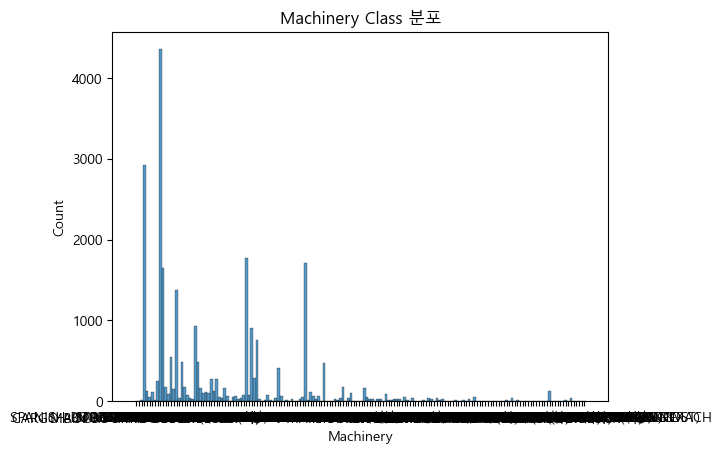

In [10]:
import seaborn as sns

# machinery 분포 시각화
plt.rcParams['font.family']='Malgun Gothic'
sns.histplot(category['Machinery'], kde=False, bins=30)
plt.title('Machinery Class 분포')
plt.show()

In [14]:
print(len(category['Assembly'].unique()))

1789


In [15]:
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'\([^)]*\)', '', text)
    text = re.sub(r'[^\w\s\*/\-\+.,#&]', '', text)
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r'\b(사용금지|사)\b', '', text, flags=re.IGNORECASE)
    text = text.strip()
    return text

def clean_supplier_name(name):
    name = name.lower()
    name = re.sub(r'coporation|coropration|coproration|corporration', 'corporation', name)
    name = re.sub(r'\(사용금지\)', '', name)
    name = re.sub(r'u\.s\.a', '_usa', name)
    name = re.sub(r'\.', '', name)
    suffixes = r'(corporation|corp|company|co|incorporated|inc|limited|ltd|상사|공사|엔지니어링|주식회사|주|gmbh|pte ltd|llc)'
    name = re.sub(suffixes, '', name, flags=re.IGNORECASE)
    name = re.sub(r'[^\w\s-]', '', name)
    name = re.sub(r'\s+', ' ', name).strip()
    return name

In [16]:
category['cleaned_supplier'] = category['발주처'].apply(clean_supplier_name)


In [32]:
subset=category['cleaned_supplier'].head(80)

In [35]:
specific_indices = [4, 18, 25, 59]
result = subset.iloc[specific_indices]

print(result)


4         matsui_usa
18              대광기업
25           kth mar
59    haein _cheonan
Name: cleaned_supplier, dtype: object


In [36]:
category['발주처'].head(80)

0     MATSUI(U.S.A) COROPRATION
1     MATSUI(U.S.A) COROPRATION
2     MATSUI(U.S.A) COROPRATION
3     MATSUI(U.S.A) COROPRATION
4     MATSUI(U.S.A) COROPRATION
                ...            
75    MATSUI(U.S.A) COROPRATION
76    MATSUI(U.S.A) COROPRATION
77    MATSUI(U.S.A) COROPRATION
78     HAEIN Coporation_Cheonan
79     HAEIN Coporation_Cheonan
Name: 발주처, Length: 80, dtype: object

In [37]:
sub=category['발주처'].head(80)

specific_indices = [4, 18, 25, 59]
result = sub.iloc[specific_indices]

print(result)

4     MATSUI(U.S.A) COROPRATION
18                      대광기업(주)
25                   K.TH MARCO
59     HAEIN Coporation_Cheonan
Name: 발주처, dtype: object


In [39]:
final = pd.read_excel('./data/filtered_30_filled_money.xlsx')

In [40]:
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13882 entries, 0 to 13881
Data columns (total 32 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   청구서번호        13882 non-null  object 
 1   No.          13882 non-null  int64  
 2   Subject      13872 non-null  object 
 3   Machinery    13882 non-null  object 
 4   Assembly     13882 non-null  object 
 5   청구품목         13882 non-null  object 
 6   Unnamed: 6   0 non-null      float64
 7   Part No.1    13881 non-null  object 
 8   Part No.2    2430 non-null   object 
 9   청구량          13818 non-null  float64
 10  견적           13698 non-null  object 
 11  견적수량         13818 non-null  float64
 12  견적화폐         13882 non-null  object 
 13  견적단가         13882 non-null  float64
 14  발주번호         13882 non-null  object 
 15  발주처          13882 non-null  object 
 16  발주           13882 non-null  object 
 17  발주수량         13818 non-null  float64
 18  발주금액         13818 non-null  float64
 19  D/T 

In [35]:
first = pd.read_excel('./data/mergedversion.xlsx')

In [37]:
print(first[['발주수량']].isnull().sum())

발주수량    119
dtype: int64


In [42]:
first.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24665 entries, 0 to 24664
Data columns (total 33 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   청구서번호        24664 non-null  object 
 1   No.          24664 non-null  float64
 2   Subject      24642 non-null  object 
 3   Machinery    24664 non-null  object 
 4   Assembly     24664 non-null  object 
 5   청구품목         24664 non-null  object 
 6   Unnamed: 6   0 non-null      float64
 7   Part No.1    24640 non-null  object 
 8   Part No.2    3599 non-null   object 
 9   청구량          24546 non-null  float64
 10  견적           24200 non-null  object 
 11  Unnamed: 11  7737 non-null   float64
 12  견적수량         16809 non-null  float64
 13  견적화폐         24546 non-null  object 
 14  견적단가         24664 non-null  float64
 15  발주번호         24664 non-null  object 
 16  발주처          24546 non-null  object 
 17  발주           24546 non-null  object 
 18  발주수량         24546 non-null  float64
 19  발주금액

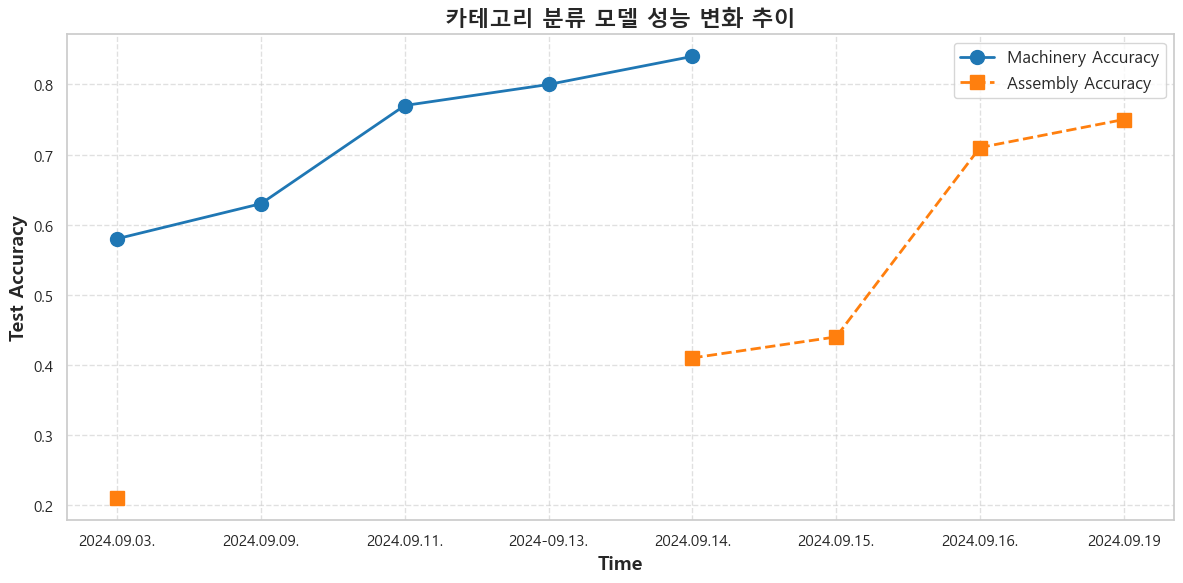

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Seaborn 스타일 설정
sns.set(style="whitegrid")

# 데이터 예시
dates = ['2024.09.03.', '2024.09.09.', '2024.09.11.', '2024-09.13.', '2024.09.14.', '2024.09.15.', '2024.09.16.', '2024.09.19', ]
machinery_accuracy = [0.58, 0.63, 0.77, 0.80, 0.84, np.nan, np.nan, np.nan]
assembly_accuracy = [0.21, np.nan, np.nan, np.nan, 0.41, 0.44, 0.71, 0.75]

#첫째 다중출력 멀티태스크 / 둘째 machinery는 word2vec+mlp / fasttext+xgb / 셋째 tf-idf+정수시퀀스+CNN / Bert+Transformer
# 다중출력 / BERT+Transformer / BERT+Attention / 정수+Catboost / 정수+XGBClassifier
# 라인 차트 그리기
plt.rcParams['font.family']='Malgun Gothic'
plt.figure(figsize=(12, 6))
plt.plot(dates, machinery_accuracy, marker='o', markersize=10, linestyle='-', linewidth=2, color='#1f77b4', label='Machinery Accuracy')
plt.plot(dates, assembly_accuracy, marker='s', markersize=10, linestyle='--', linewidth=2, color='#ff7f0e', label='Assembly Accuracy')

# 그래프 제목과 라벨 설정
plt.xlabel('Time', fontsize=14, fontweight='bold')
plt.ylabel('Test Accuracy', fontsize=14, fontweight='bold')
plt.title('카테고리 분류 모델 성능 변화 추이', fontsize=16, fontweight='bold')

# 범례 및 그리드 설정
plt.legend(fontsize=12)
plt.grid(visible=True, linestyle='--', alpha=0.6)

# 그래프를 파일로 저장 (PNG 형식)
plt.tight_layout()
plt.savefig('model_performance_over_time.png', format='png', dpi=300)

# 그래프 출력
plt.tight_layout()
plt.show()

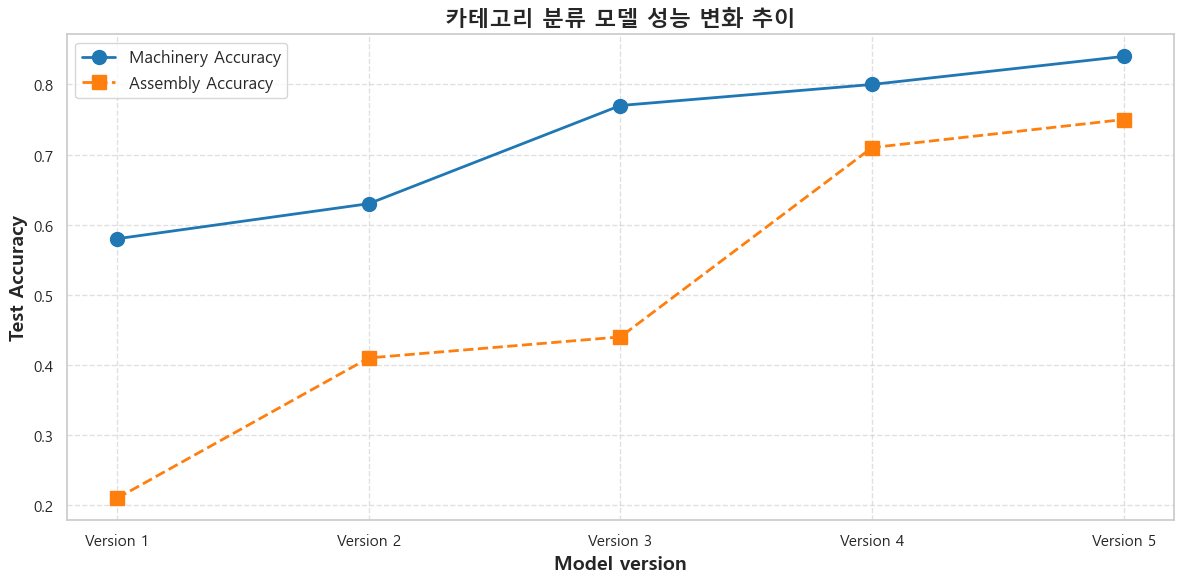

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Seaborn 스타일 설정
sns.set(style="whitegrid")

# 데이터 예시
dates = ['Version 1', 'Version 2', 'Version 3', 'Version 4', 'Version 5']
machinery_accuracy = [0.58, 0.63, 0.77, 0.80, 0.84]
assembly_accuracy = [0.21, 0.41, 0.44, 0.71, 0.75]

#첫째 다중출력 멀티태스크 / 둘째 machinery는 word2vec+mlp / fasttext+xgb / 셋째 tf-idf+정수시퀀스+CNN / Bert+Transformer
# 다중출력 / BERT+Transformer / BERT+Attention / 정수+Catboost / 정수+XGBClassifier
# 라인 차트 그리기
plt.rcParams['font.family']='Malgun Gothic'
plt.figure(figsize=(12, 6))
plt.plot(dates, machinery_accuracy, marker='o', markersize=10, linestyle='-', linewidth=2, color='#1f77b4', label='Machinery Accuracy')
plt.plot(dates, assembly_accuracy, marker='s', markersize=10, linestyle='--', linewidth=2, color='#ff7f0e', label='Assembly Accuracy')

# 그래프 제목과 라벨 설정
plt.xlabel('Model version', fontsize=14, fontweight='bold')
plt.ylabel('Test Accuracy', fontsize=14, fontweight='bold')
plt.title('카테고리 분류 모델 성능 변화 추이', fontsize=16, fontweight='bold')

# 범례 및 그리드 설정
plt.legend(fontsize=12)
plt.grid(visible=True, linestyle='--', alpha=0.6)

# 그래프를 파일로 저장 (PNG 형식)
plt.tight_layout()
plt.savefig('model_performance_over_time.png', format='png', dpi=300)

# 그래프 출력
plt.tight_layout()
plt.show() 

In [34]:
import pandas as pd

df= pd.read_excel('./data/mergedversion.xlsxl')

FileNotFoundError: [Errno 2] No such file or directory: './data/mergedversion.xlsxl'

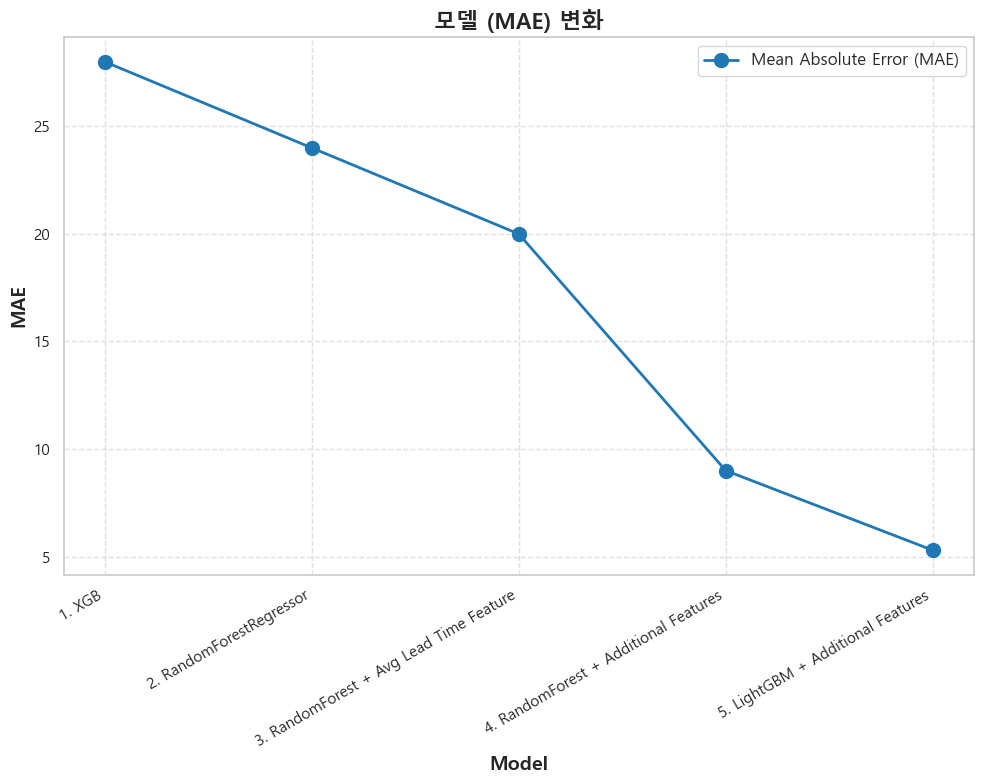

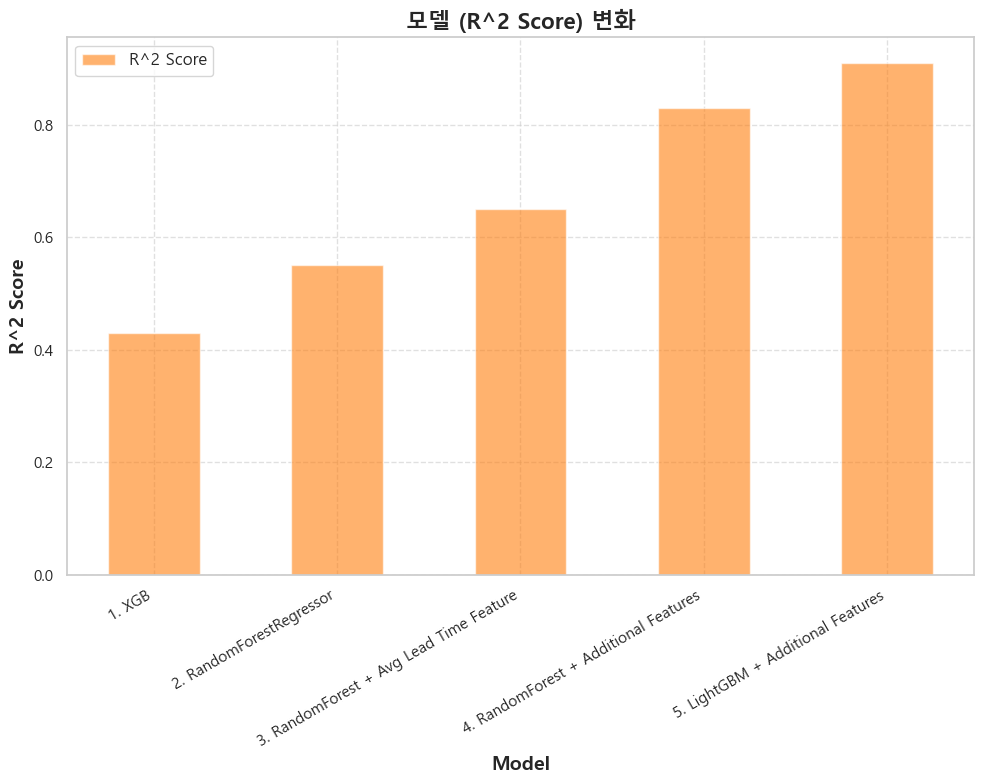

In [64]:
# Seaborn 스타일 설정

sns.set(style="whitegrid")

# 데이터 예시
models = [
    '1. XGB',
    '2. RandomForestRegressor',
    '3. RandomForest + Avg Lead Time Feature',
    '4. RandomForest + Additional Features',
    '5. LightGBM + Additional Features'
]

mae_scores = [28, 24, 20, 9, 5.3]
r2_scores = [0.43, 0.55, 0.65, 0.83, 0.91]

# MAE 추이 선 그래프
plt.rcParams['font.family']='Malgun Gothic'

plt.figure(figsize=(10, 8))
plt.plot(models, mae_scores, marker='o', markersize=10, linestyle='-', linewidth=2, color='#1f77b4', label='Mean Absolute Error (MAE)')
plt.xlabel('Model', fontsize=14, fontweight='bold')
plt.ylabel('MAE', fontsize=14, fontweight='bold')
plt.title('모델 (MAE) 변화', fontsize=16, fontweight='bold')
plt.xticks(rotation=30, ha='right')  # X축 레이블을 30도 회전하고 오른쪽 정렬
plt.legend(fontsize=12)
plt.grid(visible=True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# R^2 Score 막대 그래프
plt.figure(figsize=(10, 8))
plt.bar(models, r2_scores, color='#ff7f0e', alpha=0.6, label='R^2 Score', width=0.5)
plt.xlabel('Model', fontsize=14, fontweight='bold')
plt.ylabel('R^2 Score', fontsize=14, fontweight='bold')
plt.title('모델 (R^2 Score) 변화', fontsize=16, fontweight='bold')
plt.xticks(rotation=30, ha='right')  # X축 레이블을 30도 회전하고 오른쪽 정렬

plt.legend(fontsize=12)
plt.grid(visible=True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()